<a href="https://colab.research.google.com/github/anaisaoviedo-upb/LLM-Gemini/blob/main/LLM_Gemini.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**LLM Gemini**

Pasos:

1. Crear cuenta en https://gemini.google.com/?hl=es
2. https://console.cloud.google.com/
3. APIS y Servicios/ Credenciales /Crear credenciales/Crear Clave de API
4. Copiar la credencial y guardarla
5. Regresar a APIS y Servicios, ingresar por la opción Habilitar APIs y Servicios
5. Buscar: Generative Language API
6. Habilitar Gemini API


In [ ]:
#Instalar librería
!pip install -q -U google-generativeai

In [ ]:
import google.generativeai as genai

In [ ]:
#Configurar clave de acceso
genai.configure(api_key='aqui')

model = genai.GenerativeModel('gemini-1.5-flash')

In [ ]:
# Revisar modelos disponibles
models = genai.list_models()
for model in models:
    print(f"Model: {model.name}, Supported methods: {model.supported_generation_methods}")

Model: models/chat-bison-001, Supported methods: ['generateMessage', 'countMessageTokens']
Model: models/text-bison-001, Supported methods: ['generateText', 'countTextTokens', 'createTunedTextModel']
Model: models/embedding-gecko-001, Supported methods: ['embedText', 'countTextTokens']
Model: models/gemini-1.0-pro-vision-latest, Supported methods: ['generateContent', 'countTokens']
Model: models/gemini-pro-vision, Supported methods: ['generateContent', 'countTokens']
Model: models/gemini-1.5-pro-latest, Supported methods: ['generateContent', 'countTokens']
Model: models/gemini-1.5-pro-001, Supported methods: ['generateContent', 'countTokens', 'createCachedContent']
Model: models/gemini-1.5-pro-002, Supported methods: ['generateContent', 'countTokens', 'createCachedContent']
Model: models/gemini-1.5-pro, Supported methods: ['generateContent', 'countTokens']
Model: models/gemini-1.5-flash-latest, Supported methods: ['generateContent', 'countTokens']
Model: models/gemini-1.5-flash-001, Su

In [ ]:
PROMPT="Que es la inteligencia artificial"
response = model.generate_content(PROMPT)
response.text

'La inteligencia artificial (IA) es un campo de la informática que se centra en la creación de máquinas capaces de realizar tareas que normalmente requieren inteligencia humana.  Esto incluye tareas como el aprendizaje, la resolución de problemas, el reconocimiento de patrones, el razonamiento, la comprensión del lenguaje natural y la toma de decisiones.\n\nNo hay una única definición universalmente aceptada, ya que el campo es amplio y en constante evolución.  Sin embargo, la mayoría de las definiciones coinciden en que la IA se enfoca en simular la inteligencia humana en máquinas.\n\nExisten diferentes enfoques para la IA, incluyendo:\n\n* **IA estrecha o débil (ANI):**  Diseñada para realizar una tarea específica, como jugar al ajedrez o recomendar productos.  La mayoría de la IA que existe hoy en día es IA estrecha.\n\n* **IA general o fuerte (AGI):** Una IA hipotética con la capacidad de comprender, aprender y aplicar conocimiento a cualquier tarea intelectual que un humano pueda 

In [ ]:
#Respuesta a la pregunta anterior
texto=response.text

PROMPT="Quiero un resumen en una frase de la siguiente definición:"+ texto
response = model.generate_content(PROMPT)
response.text

'La inteligencia artificial busca crear máquinas que imiten la inteligencia humana, abarcando desde tareas específicas hasta la hipotética superinteligencia.\n'

In [ ]:
#Prompting Engineering



# **Analizar datos con Gemini**

In [ ]:
#Cargamos librerías principales de python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#Cargamos los datos
data = pd.read_excel("que te gusta ver en tv.xlsx", sheet_name=0)
data.head()

,NOMBRE,TV,Unnamed: 2,Unnamed: 3
0,Ana,Me gustan las series de 2 terror y suspenso po...,NaN,NaN
1,Ana Isabel Blanco,Me gustan las caricaturas porque son relajante...,NaN,NaN
2,Juan Jose Palacio,Series de investigación policial por las concl...,NaN,NaN
3,Santiago Ramirez,Me gustan las series de suspenso y fantasia po...,NaN,NaN
4,Juan,"Me gustan las peliculas de acción, comedia y l...",NaN,NaN


In [ ]:
respuesta = []
for texto in data['TV'].iloc[:10]:
  PROMPT="Dime en una palabra el tipo de programas de televisión que le gusta ver a la persona de este comentario: "  + texto
  response = model.generate_content(PROMPT)
  respuesta.append(response.text)

data['respuesta_llm'] = None
data.loc[:9, 'respuesta_llm'] = respuesta
data

,NOMBRE,TV,Unnamed: 2,Unnamed: 3,respuesta_llm
0,Ana,Me gustan las series de 2 terror y suspenso po...,NaN,NaN,Terror\n
1,Ana Isabel Blanco,Me gustan las caricaturas porque son relajante...,NaN,NaN,Animaciones\n
2,Juan Jose Palacio,Series de investigación policial por las concl...,NaN,NaN,Procedimentales\n
3,Santiago Ramirez,Me gustan las series de suspenso y fantasia po...,NaN,NaN,Fantasía\n
4,Juan,"Me gustan las peliculas de acción, comedia y l...",NaN,NaN,Entretenimiento\n
...,...,...,...,...,...
276,Nicolas Mantilla Gelves,Me gusta ver partidos de futbol en especial el...,NaN,NaN,None
277,Camilo Marín Muriel (NPC #3),Me gusta ver películas de acción y ciencia fic...,NaN,NaN,None
278,NN,Me gusta ver películas de acción y ciencia fic...,NaN,NaN,None
279,Isabela Arrubla,"La reina del flow, novelas, anime y peliculas ...",NaN,NaN,None


<Axes: ylabel='count'>

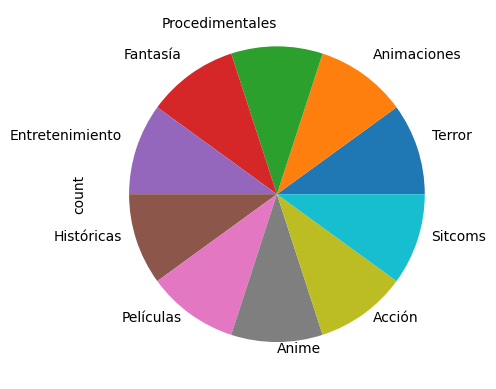

In [ ]:
data['respuesta_llm'].value_counts().plot(kind='pie')

In [ ]:
#Concatenar todo en un solo texto
texto=' '.join(data['TV'])
texto

'Me gustan las series de 2 terror y suspenso porque me da mucho susto Me gustan las caricaturas porque son relajantes y graciosas.  Series de investigación policial por las conclussiones reveladoras. Me gustan las series de suspenso y fantasia porque observar la imaginacion de los escritores Me gustan las peliculas de acción, comedia y las series de época y de suspenso porque me entretienen mucho  Me agrada ver peliculas sobre la edad media  Me gustan las peliculas, no veo series porque implica mas tiempo y nunca tengo, asi que no las puedo ver. La pelicula inicia y termina en 2 horas maximo. Me gustan las series animadas, y poder visualizar el camino del héroe propuesto en cada una de ellas. Me gustan peliculas de accion Me gustan las sitcom como Friends, Seinfeld, The office porque considero que tienen muy buena comedia Me gustan las series de acción y suspenso porque siempre me dejan con ganas de querer más. Me gusta ver Documentales de historía, programas de Cocina y algo de cine p

In [ ]:
PROMPT="Tengo la respuesta de muchos estudiantes a la pregunta qué te gusta ver en televisión. Quiero saber cual es la respuesta mas comun. Estos son los datos:"+ texto
response = model.generate_content(PROMPT)
response.text

'Analizando las respuestas, las categorías más comunes que mencionan los estudiantes son:\n\n1. **Acción:**  Aparece en muchísimas respuestas, a menudo combinada con comedia, suspenso, o drama. Es la categoría más popular.\n\n2. **Comedia:**  Similarmente frecuente, también se combina con otros géneros.\n\n3. **Series:** Mencionada con mucha frecuencia, aunque los géneros específicos de las series varían bastante (acción, comedia, suspenso, ciencia ficción, etc). No es un género en sí, sino un formato.\n\n4. **Suspenso/Terror:**  Se repite con frecuencia, a veces conjuntamente o de forma individual.\n\n5. **Documentales:** Un género que aparece notablemente en muchas respuestas.\n\n6. **Ciencia Ficción:** Un género popular, a menudo junto a series o películas de acción.\n\n7. **Fútbol:** Aunque no es un género televisivo, se menciona con una frecuencia significativa.\n\n\nEs difícil determinar UNA respuesta más común sin una herramienta de conteo automatizado.  La respuesta más precisa